In [1]:
import pipeline
import pipeline_continue 
import filepaths as fp

import torch

from pos_model import EncoderPOS, AttnDecoderPOS
from pos_model_train import trainIters
from pos_model_predict import predict_all

In [4]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderPOS(s_vocab_size, max_length, hidden_size).to(device)
    attn_decoder = AttnDecoderPOS(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
#     plot_every = n_epochs * len(index_array_pairs)/20.
#     print_every=n_epochs * len(index_array_pairs)/25.
    plot_every = 5000
    print_every = 5000
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_epochs, max_length, 
        print_every, plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours, clip=clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every




In [ ]:
#### TOY DATA
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
# n_iters = 10
n_epochs = 30
max_hours = 9
clip = 10

MAX_LENGTH = 24
encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = False, num_operations = 80, vocab_threshold = 1,
    padding = False)

Data files preprocessed ...

23133 inputs constructed for training ...

25m 9s (- 1138m 36s) (5000 2%) 4.3565
49m 44s (- 1100m 52s) (10000 4%) 3.7441
74m 27s (- 1073m 45s) (15000 6%) 3.4669
99m 50s (- 1054m 54s) (20000 8%) 3.2376
125m 20s (- 1034m 29s) (25000 10%) 3.2657
150m 7s (- 1007m 27s) (30000 12%) 2.8032
174m 37s (- 979m 34s) (35000 15%) 2.6720
200m 1s (- 956m 47s) (40000 17%) 2.6692
225m 54s (- 935m 25s) (45000 19%) 2.7116
250m 53s (- 909m 52s) (50000 21%) 2.5876
275m 50s (- 884m 21s) (55000 23%) 2.3421
300m 37s (- 858m 27s) (60000 25%) 2.3249
325m 54s (- 833m 59s) (65000 28%) 2.3205
351m 34s (- 810m 17s) (70000 30%) 2.5050
376m 24s (- 784m 35s) (75000 32%) 2.1972
401m 5s (- 758m 43s) (80000 34%) 2.0906
426m 10s (- 733m 40s) (85000 36%) 2.1214
451m 46s (- 709m 25s) (90000 38%) 2.1613
477m 20s (- 685m 0s) (95000 41%) 2.2604
502m 19s (- 659m 41s) (100000 43%) 1.9594
526m 58s (- 634m 1s) (105000 45%) 1.9060
exceeded max hours 9
exceeded max hours 9
exceeded max hours 9
exceeded ma

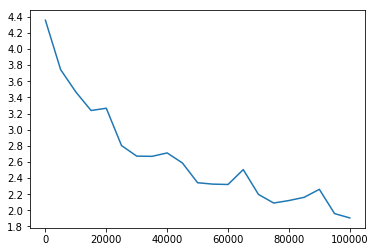

Losses diagram saved in TODO
Models and data saved in: encoder.pt, attn_decoder.pt, data_run

789 inputs constructed for testing ...

789 outputs predicted ...

Predictions written to ../output/val.preprocessed-test.predicted.en
Blue score written to ../output/val.preprocessed-test.BLEU
deux hommes portant des kimonos s&apos; <UNKNOWN> aux arts martiaux . EOS
deux hommes portant des kimonos s&apos; <UNKNOWN> aux arts martiaux . EOS
two small white dogs are running EOS
two small white dogs are running EOS


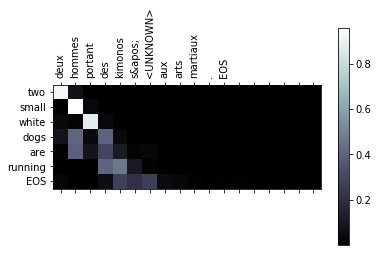

des gens faisant du bateau sur un lac avec le soleil traversant les nuages au loin . EOS
des gens faisant du bateau sur un lac avec le soleil traversant les nuages au loin . EOS
people are walking around the <UNKNOWN> of stairs EOS
people are walking around the <UNKNOWN> of stairs EOS


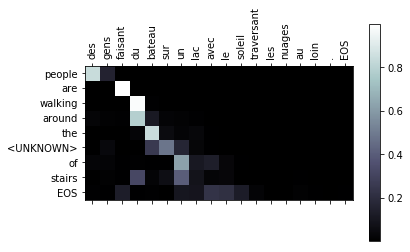

un vieil homme marchant avec un <UNKNOWN> à la main EOS
un vieil homme marchant avec un <UNKNOWN> à la main EOS
a bird <UNKNOWN> is riding a bicycle EOS
a bird <UNKNOWN> is riding a bicycle EOS


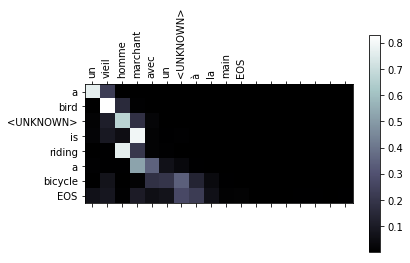

Attention diagrams saved in TODO


In [5]:
#### TRAIN and TEST DATA
# verplaats directory van je modelsss na runnen 
hidden_size = 512 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 10
max_hours = 9
clip = 8

MAX_LENGTH = 17
encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_val, fp.tpath_val, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = False, num_operations = 100, vocab_threshold = 1, 
    padding = False)